## 路网长link切分以及简单可视化

In [1]:
import pymongo
import shapely
import folium
import copy
import random
import pandas as pd
import pymongo
import geopandas as gpd

myclient = pymongo.MongoClient("mongodb://192.168.120.127:27017")
mydb = myclient["tmap"]
data = pd.DataFrame(list(mydb.link.find()))
data.head()

,_added_direction,_id,_nodes,_nodes1,access,bridge,district_id,district_name,geometry_geojson,highway,...,length,maxspeed,name,oneway,osmid,ref,tunnel,u,v,width
0,False,0A9LMyxF480JP0FbQv515,"[2382831780, 3360886858, 2382700813]","[2382831780, 2382700813]",NaN,yes,4591400.0,江干区,"{'coordinates': [[120.2155109, 30.3080124], [1...",trunk_link,...,83.800,NaN,NaN,True,660407954,NaN,NaN,2382831780,2382700813,NaN
1,True,0AM4JWIZro2lYUpg661x,"[4807783596, 26869728, 183482276]","[4807783596, 183482276]",NaN,NaN,4591385.0,下城区,"{'coordinates': [[120.1817589, 30.2683606], [1...",unclassified,...,209.185,NaN,NaN,False,17707167,NaN,NaN,4807783596,183482276,NaN
2,False,0Bby2pHggbdlAh558zK9,"[1519371447, 1519371538, 1519371565, 151937148...","[1519371447, 1519371471]",NaN,NaN,4591410.0,西湖区,"{'coordinates': [[120.1056102, 30.2478288], [1...",unclassified,...,323.031,NaN,NaN,False,138577391,NaN,NaN,1519371447,1519371471,NaN
3,True,0Bby2pHggbdlpT558zKR,"[1519371471, 1519371449, 1519371465, 151937141...","[1519371471, 1519371447]",NaN,NaN,4591410.0,西湖区,"{'coordinates': [[120.1030003, 30.246514], [12...",unclassified,...,323.031,NaN,NaN,False,138577391,NaN,NaN,1519371471,1519371447,NaN
4,False,0BbyQKTggbqB9HqDlgYo,"[1519392959, 1519554164, 1519554084, 151955410...","[1519392959, 4886673468]",NaN,NaN,4591410.0,西湖区,"{'coordinates': [[120.0918221, 30.2371683], [1...",unclassified,...,414.624,30.0,中法路,False,138577237,NaN,NaN,1519392959,4886673468,NaN


In [2]:
data = data.sort_values(by=['length'], ascending=False)
data[data['name']=='机场城市大道'].shape

(8, 26)

In [3]:
data['length'].mean()

217.1831495549958

In [4]:
1.5*(data['length'].quantile(q=0.75)-data['length'].quantile(q=0.25))

340.75200000000007

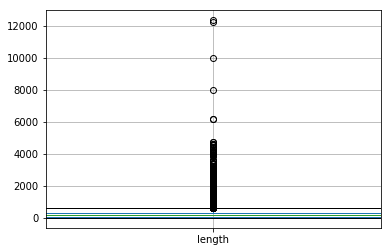

In [5]:
%matplotlib inline
data.boxplot(column = 'length',widths =(2))

In [6]:
import geojson
data['geometry'] = data['geometry_geojson'].apply(shapely.geometry.asShape)
data = data.drop(columns=['_id'])
gdf1 = gpd.GeoDataFrame(data)
gdf1.head()

,_added_direction,_nodes,_nodes1,access,bridge,district_id,district_name,geometry_geojson,highway,id,...,maxspeed,name,oneway,osmid,ref,tunnel,u,v,width,geometry
23031,False,"[5160236076, 5160236116, 5160236115, 516023611...","[5160236076, 5158768814]",NaN,NaN,3221179.0,滨江区,"{'coordinates': [[120.3539126, 30.2136184], [1...",primary,lWqevL5hW1ekKRU2rBAA0,...,NaN,机场城市大道,True,531431468,NaN,NaN,5160236076,5158768814,NaN,"LINESTRING (120.3539126 30.2136184, 120.353324..."
9082,False,"[4820100209, 5158768808, 5158768809, 515876881...","[4820100209, 5160236078]",NaN,NaN,3221179.0,滨江区,"{'coordinates': [[120.2279977, 30.2198489], [1...",primary,E9EQoM2tr0A5YzHBzkLR4,...,NaN,机场城市大道,True,531431467,NaN,NaN,4820100209,5160236078,NaN,"LINESTRING (120.2279977 30.2198489, 120.228171..."
5335,False,"[3035358452, 3035357588, 5596048378, 289068070...","[3035358452, 2890680730]",NaN,NaN,NaN,,"{'coordinates': [[120.3344389, 30.2006057], [1...",primary,7nQpJOoCjlWo9RUon4xD6,...,NaN,建设四路,True,505097816,NaN,NaN,3035358452,2890680730,NaN,"LINESTRING (120.3344389 30.2006057, 120.334301..."
15466,False,"[4087229825, 5634394752, 1668711812, 289068074...","[4087229825, 1728952765]",NaN,NaN,NaN,,"{'coordinates': [[120.2304275, 30.2144327], [1...",primary,VdLq3Zf7w3EqkTZMzeE1,...,NaN,建设四路,True,113467440,NaN,NaN,4087229825,1728952765,NaN,"LINESTRING (120.2304275 30.2144327, 120.230672..."
22121,False,"[5598294227, 5956192106, 5541665318, 554166531...","[5598294227, 3373270288]",NaN,yes,4591384.0,拱墅区,"{'coordinates': [[120.2454129, 30.4243771], [1...",trunk,k9ez8vyH7Ol49jHOK1jEy,...,NaN,秋石高架,True,658403039,NaN,NaN,5598294227,3373270288,NaN,"LINESTRING (120.2454129 30.4243771, 120.236819..."


### 切分前长link路网，取距离大于3km的link

In [9]:
tips = folium.features.GeoJsonTooltip(fields=['name'])
highlight_function = lambda x:{'color': "#000000"}
color_func = lambda x:{'color': "#%06x" % random.randint(0, 0xFFFFFF),'opacity':0.5}
gdf2 = gdf1.iloc[:300]
m = folium.Map([30.186518,120.176028], zoom_start=11)
folium.GeoJson(gdf2.__geo_interface__,style_function=color_func,tooltip=tips,highlight_function=highlight_function).add_to(m)
m

In [10]:
import hashids
from hashids import Hashids
import geopy.distance

def gen_osm_id(*args):
    hashid = hashids.encode(*args)
    return hashid

def get_distance(origin_point, new_point):
    dist = geopy.distance.distance(tuple(origin_point), tuple(new_point)).m
    return dist
hashids = Hashids(salt='this is my salt 1')

In [11]:
districts = [
    {'city': '杭州市', 'district': '上城区'},
    {'city': '杭州市', 'district': '下城区'},
    {'city': '杭州市', 'district': '拱墅区'},
    {'city': '杭州市', 'district': '西湖区'},
    {'city': '杭州市', 'district': '江干区'},
    {'city': '杭州市', 'district': '滨江区'},
]

In [12]:
def get_district_gdf(districts):
    district_docs = []
    for district in districts:
        doc = mydb.district.find_one(district)
        district_docs.append(doc)
    district_gdf = pd.DataFrame(district_docs)
    return district_gdf


def osm_node_way_df_from_response_jsons(response_jsons):
    nodes, paths = {}, {}
    for osm_data in response_jsons:
        nodes_temp, paths_temp = osmnx.parse_osm_nodes_paths(osm_data)
        for key, value in nodes_temp.items():
            nodes[key] = value
        for key, value in paths_temp.items():
            paths[key] = value
    nodes_df = pd.DataFrame.from_dict(nodes, orient='index')
    ways_df = pd.DataFrame.from_dict(paths, orient='index')
    return nodes_df, ways_df

### 初始化图

In [13]:
import osmnx
district_gdf = get_district_gdf(districts)
district_gdf = gpd.GeoDataFrame(district_gdf)
district_gdf['polygon'] = district_gdf['geojson'].apply(shapely.geometry.shape)
district_gdf = district_gdf.set_geometry('polygon', crs='EPSG:4326')
polygon_unary = district_gdf.polygon.unary_union
osm_json = osmnx.osm_net_download(polygon=polygon_unary, network_type='drive')
osm_node_df, osm_way_df = osm_node_way_df_from_response_jsons(osm_json)
network_type = 'drive'
main_graph = osmnx.core.create_graph(osm_json,network_type=network_type)

### 将每个link的nodes根据统计规律切分

In [14]:
def extra_nodes(row):
    nodes = row['_nodes'].iloc[0]

    def divid_nodes_array(nodes):
        node_init, index_init = nodes[0], 0
        nodes_array = [node_init]
        nodes_array_dict ={}
        for i in range(1, len(nodes)):
            point_init = row.iloc[0]['geometry_geojson']['coordinates'][index_init][::-1]
            point_end = row.iloc[0]['geometry_geojson']['coordinates'][i][::-1]
            if get_distance(point_init, point_end) > 350 and i != len(nodes):
                nodes_array.append(nodes[i])
                nodes_array_dict[nodes[i]] = point_end
                index_init = i
            elif get_distance(point_init, point_end) < 350 and i != len(nodes):
                pass
            elif i == len(nodes):
                nodes_array.append(nodes[i])
        return nodes_array, nodes_array_dict

    # the edge name should be single and nodes should not be closed

    nodes_to_bedivid, nodes_dict = divid_nodes_array(nodes)
    nodes_to_bedivid = nodes_to_bedivid[1:-1]
    edge_divided = pd.DataFrame(columns=['osmid', 'x', 'y'])
    if nodes_to_bedivid:
        for item in nodes_to_bedivid:
            new_row = pd.DataFrame({'osmid' :item, 'x':nodes_dict[item][0], 'y':nodes_dict[item][1]}, index=[int(item)])
            edge_divided = edge_divided.append(new_row)
        edge_divided['highway'],edge_divided['ref'] = None, None

        return edge_divided

    return None

### 切分的效果，如将row1的1条link切分成26条 

In [15]:
processed = extra_nodes(gdf2.head(1))
processed.shape

(26, 5)

In [16]:
def extra_nodes_tuple(row):
    nodes = row['_nodes']

    def divid_nodes_array(nodes):
        node_init, index_init = nodes[0], 0
        nodes_array = [node_init]
        nodes_array_dict ={}
        for i in range(1, len(nodes)):
            point_init = row['geometry_geojson']['coordinates'][index_init][::-1]
            point_end = row['geometry_geojson']['coordinates'][i][::-1]
            if get_distance(point_init, point_end) > 350 and i != len(nodes):
                nodes_array.append(nodes[i])
                nodes_array_dict[nodes[i]] = point_end
                index_init = i
            elif get_distance(point_init, point_end) < 350 and i != len(nodes):
                pass
            elif i == len(nodes):
                nodes_array.append(nodes[i])
        return nodes_array, nodes_array_dict

    # the edge name should be single and nodes should not be closed

    nodes_to_bedivid, nodes_dict = divid_nodes_array(nodes)
    nodes_to_bedivid = nodes_to_bedivid[1:-1]
    return tuple(nodes_to_bedivid)

### 创建除了osm way起止点和路口外需要切的点列表

In [17]:
added_nodes_tuple = ()

for index, row in gdf2.iterrows():
    row_divid = extra_nodes_tuple(row)
    print('row{} is done...'.format(index))
    added_nodes_tuple += row_divid

row23031 is done...
row9082 is done...
row5335 is done...
row15466 is done...
row22121 is done...
row13166 is done...
row9815 is done...
row29233 is done...
row11657 is done...
row13648 is done...
row24610 is done...
row1908 is done...
row29417 is done...
row8712 is done...
row2371 is done...
row20313 is done...
row9829 is done...
row2121 is done...
row1598 is done...
row28116 is done...
row20680 is done...
row14032 is done...
row18279 is done...
row3850 is done...
row26800 is done...
row14172 is done...
row17695 is done...
row3290 is done...
row8544 is done...
row18783 is done...
row3832 is done...
row2602 is done...
row15725 is done...
row27901 is done...
row22118 is done...
row28660 is done...
row6189 is done...
row27812 is done...
row17293 is done...
row19512 is done...
row16289 is done...
row20927 is done...
row10959 is done...
row4850 is done...
row21243 is done...
row16841 is done...
row17911 is done...
row21062 is done...
row25295 is done...
row24415 is done...
row4291 is done.

In [18]:
% cd osmnx_hz/
import utils_osm

/media/sunmengnan/F_Disk/TR/gitlab/algorithms/02-edge-subdivision/osmnx_hz


### 在切分的点中加入osm way起止点，共19397个点

In [19]:
osm_way_uv_point = osm_way_df['nodes'].map(lambda x: (x[0],x[-1])).sum()
len(osm_way_uv_point)

18490

In [20]:
added_nodes_update = added_nodes_tuple+osm_way_uv_point
len(added_nodes_update)

19397

In [21]:
from utils_osm import is_endpoint,get_paths_to_simplify,simplify_graph_ext1

In [22]:
graph_cut = simplify_graph_ext1(main_graph,strict=False,other_endpoints=added_nodes_update)

123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


In [23]:
graph_cut_node,graph_cut_edge = osmnx.save_load.graph_to_gdfs(graph_cut, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)

#### 机场大道从之前的8个link切到了57个link

In [24]:
graph_cut_edge = graph_cut_edge.sort_values(by=['length'], ascending=False)
graph_cut_edge[graph_cut_edge['name']=='机场城市大道'].shape

(57, 18)

In [25]:
graph_cut_edge_airport = graph_cut_edge[graph_cut_edge['name']=='机场城市大道']
graph_cut_edge_airport.head()

,_nodes,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,tunnel,u,v,width
30094,NaN,NaN,NaN,"LINESTRING (120.3047488 30.2206912, 120.317563...",primary,NaN,0,NaN,1249.927,NaN,机场城市大道,True,531431467,NaN,NaN,2883842746,5160236033,NaN
14013,"[5160236027, 5160236028, 5160236032, 2883842746]",NaN,NaN,"LINESTRING (120.2949165 30.222197, 120.2950986...",primary,NaN,0,NaN,959.532,NaN,机场城市大道,True,531431467,NaN,NaN,5160236027,2883842746,NaN
8371,"[5158769805, 5264998031, 5158769804]",NaN,NaN,"LINESTRING (120.2842997 30.2241455, 120.282181...",primary,NaN,0,NaN,854.436,NaN,机场城市大道,True,531431468,NaN,NaN,5158769805,5158769804,NaN
14411,"[5160237177, 5160237158, 5160236050]",NaN,NaN,"LINESTRING (120.3385813 30.2155536, 120.338713...",primary,NaN,0,NaN,805.171,NaN,机场城市大道,True,531431467,NaN,NaN,5160237177,5160236050,NaN
14015,"[5160236036, 5160405722, 5160236103]",NaN,NaN,"LINESTRING (120.3048256 30.2209858, 120.303521...",primary,NaN,0,NaN,650.272,NaN,机场城市大道,True,531431468,NaN,NaN,5160236036,5160236103,NaN


In [27]:
graph_cut_edge_shorten = graph_cut_edge[:1800]

### 切分长link之后

In [28]:
m = folium.Map([30.186518,120.176028], zoom_start=11)
color_func = lambda x:{'color': "#%06x" % random.randint(0, 0xFFFFFF),'opacity':0.5}
highlight_function = lambda x:{'color': "#000000"}
tips = folium.features.GeoJsonTooltip(fields=['name'])
folium.GeoJson(graph_cut_edge_shorten.__geo_interface__,style_function=color_func,tooltip=tips,highlight_function=highlight_function).add_to(m)
m

### 以机场城市大道为例，切分机场城市大道link之前

In [29]:
graph_init_edge_airport = gdf2[gdf2['name']=='机场城市大道']

In [36]:
m = folium.Map([30.22158,120.30088], zoom_start=13)
color_func = lambda x:{'color': "#%06x" % random.randint(0, 0xFFFFFF),'opacity':0.9}
highlight_function = lambda x:{'color': "#000000"}
tips = folium.features.GeoJsonTooltip(fields=['name'])
folium.GeoJson(graph_init_edge_airport.__geo_interface__,style_function=color_func,tooltip=tips,highlight_function=highlight_function).add_to(m)
m

### 切分机场城市大道之后

In [37]:
m = folium.Map([30.22158,120.30088], zoom_start=13)
color_func = lambda x:{'color': "#%06x" % random.randint(0, 0xFFFFFF),'opacity':0.9}
highlight_function = lambda x:{'color': "#000000"}
tips = folium.features.GeoJsonTooltip(fields=['name'])
folium.GeoJson(graph_cut_edge_airport.__geo_interface__,style_function=color_func,tooltip=tips,highlight_function=highlight_function).add_to(m)
m